### Data for this assignment:
* URL: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv
* On Kaggel Notebook, you can add the data set by searching the above URL
* Column “price” is the target variable to predict.


In [ ]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
import pandas as pd
df = pd.read_csv("AB_NYC_2019.csv")

#### Question 1:
Examine the features of the data. Identify which feature is continuous and which feature is categorical. Make some analyses and use your analyses to discuss whether each feature could be useful for predicting the "price."

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: >

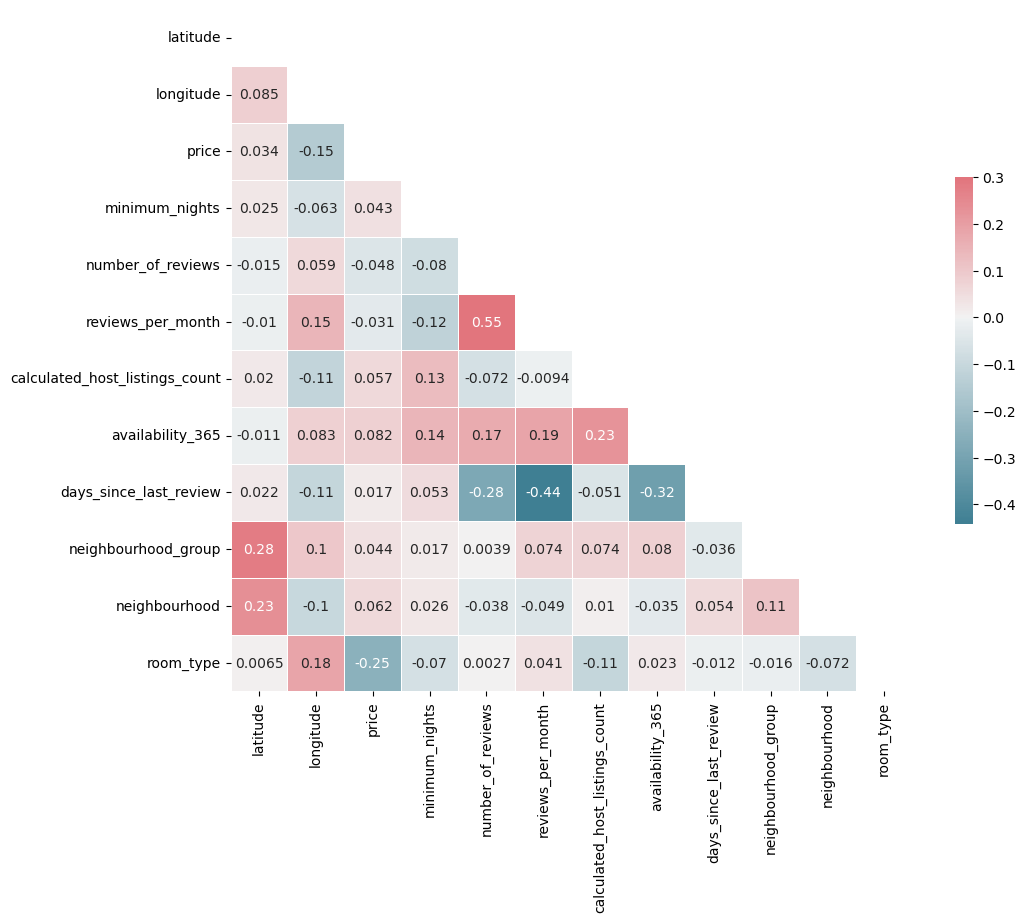

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
encoded_neighbourhood_room_type_df = df[['neighbourhood_group', 'neighbourhood', 'room_type']]

from sklearn import preprocessing
label_encoder_for_categorical_data = preprocessing.LabelEncoder()
encoded_neighbourhood_room_type_df = encoded_neighbourhood_room_type_df.apply(label_encoder_for_categorical_data.fit_transform)

df['last_review'] = pd.to_datetime(df['last_review'])

reference_date_for_review_calculation = pd.to_datetime('today')
df['days_since_last_review'] = (reference_date_for_review_calculation - df['last_review']).dt.days

encoded_neighbourhood_room_type_df = pd.concat([df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                     'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review']], encoded_neighbourhood_room_type_df], 
                axis=1)

correlation_matrix_of_features = encoded_neighbourhood_room_type_df.corr()

upper_triangle_mask_for_heatmap = np.triu(np.ones_like(correlation_matrix_of_features, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_matrix_of_features, mask=upper_triangle_mask_for_heatmap, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
encoded_neighbourhood_room_type_df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_group,neighbourhood,room_type
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983,0.021828,0.279560,0.234793,0.006481
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731,-0.105687,0.101171,-0.102381,0.184341
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829,0.016811,0.044246,0.062057,-0.249350
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303,0.052803,0.017404,0.026000,-0.069792
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028,-0.283000,0.003853,-0.038342,0.002724
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,-0.441489,0.073795,-0.049377,0.040671
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701,-0.050702,0.073671,0.010327,-0.106055
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000,-0.319512,0.080450,-0.034655,0.022500
days_since_last_review,0.021828,-0.105687,0.016811,0.052803,-0.283000,-0.441489,-0.050702,-0.319512,1.000000,-0.036093,0.054014,-0.011908
neighbourhood_group,0.279560,0.101171,0.044246,0.017404,0.003853,0.073795,0.073671,0.080450,-0.036093,1.000000,0.111333,-0.016337


## Attribute Information Overview

---

This section details the 16 attributes contained within our dataset. Each attribute is evaluated for its type (Categorical, Continuous, or Discrete) and relevance in determining the price. Below is a table that succinctly organizes this information.

| Attribute Name                     | Data Type     | Relevance to Price Determination |
|------------------------------------|---------------|----------------------------------|
| id                                 | Discrete      | No                               |
| name                               | Categorical   | No                               |
| host_id                            | Discrete      | No                               |
| host_name                          | Categorical   | No                               |
| neighbourhood_group                | Categorical   | Yes                              |
| neighbourhood                      | Categorical   | Yes                              |
| latitude                           | Continuous    | Yes                              |
| longitude                          | Continuous    | Yes                              |
| room_type                          | Categorical   | Yes                              |
| price                              | Continuous    | Yes                              |
| minimum_nights                     | Discrete      | No                               |
| number_of_reviews                  | Continuous    | No                               |
| last_review                        | Continuous    | No                               |
| reviews_per_month                  | Continuous    | No                               |
| calculated_host_listings_count     | Discrete      | No                               |
| availability_365                   | Discrete      | No                               |

---


#### Question 2:
Create plots to visualize the distribution of the target "price" vs the distribution of  each predictors. Do you notice anything that might require special treatment? Discuss your findings and suggestions on wrangling the data for the prediction task.

Text(0.5, 0.98, 'Predictor vs Price')

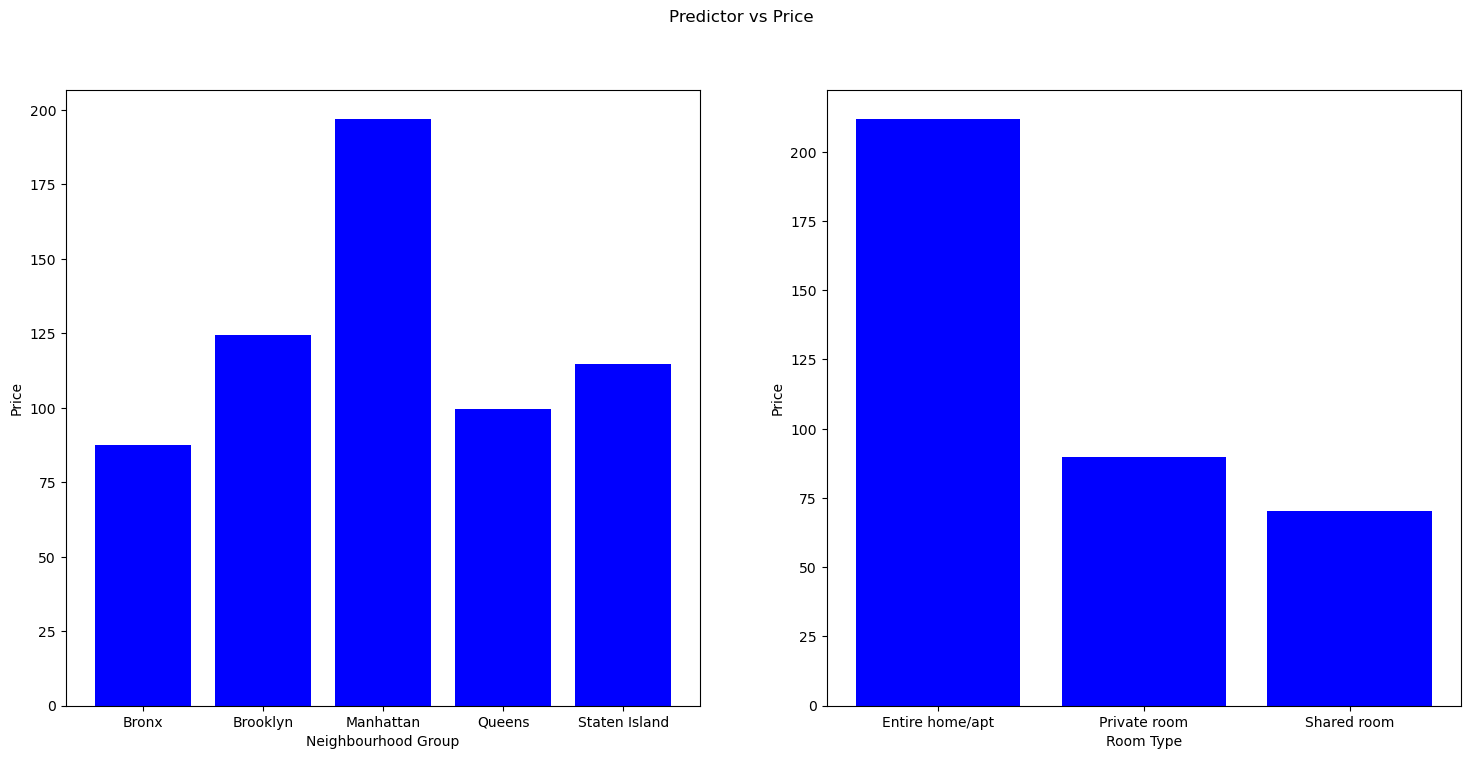

In [ ]:
import matplotlib.pyplot as plt

average_price_by_neighbourhood_group = dict(df.groupby('neighbourhood_group')['price'].mean())

average_price_by_room_type = dict(df.groupby('room_type')['price'].mean())

figure_for_price_comparison, subplots_for_price_comparison = plt.subplots(1, 2, figsize=(18, 8), sharey=False)
subplots_for_price_comparison[0].bar(average_price_by_neighbourhood_group.keys(), average_price_by_neighbourhood_group.values(), color='blue')
subplots_for_price_comparison[1].bar(average_price_by_room_type.keys(), average_price_by_room_type.values(), color='blue')

plt.setp(subplots_for_price_comparison[0], ylabel='Price')
plt.setp(subplots_for_price_comparison[1], ylabel='Price')
plt.setp(subplots_for_price_comparison[0], xlabel='Neighbourhood Group')
plt.setp(subplots_for_price_comparison[1], xlabel='Room Type')


figure_for_price_comparison.suptitle('Predictor vs Price')


In [ ]:
import plotly.express as px

average_price_by_each_neighbourhood = dict(df.groupby('neighbourhood')['price'].mean())

plotly_histogram_figure = px.histogram(df, x=average_price_by_each_neighbourhood.keys(), y=average_price_by_each_neighbourhood.values())
plotly_histogram_figure.update_layout(title='Neighbourhood vs. Price', xaxis_title='Neighbourhood', yaxis_title='Average Price')
plotly_histogram_figure.show()



In [ ]:
list_of_prices_from_dataframe = df['price'].tolist()

list_of_latitude_values = df.latitude.tolist()
list_of_longitude_values = df.longitude.tolist()

minimum_price_in_list = min(list_of_prices_from_dataframe)
maximum_price_in_list = max(list_of_prices_from_dataframe)

mean_price_by_neighbourhood_group = df.groupby(['neighbourhood_group'])['price'].mean()
list_of_neighbourhood_group_names = list(mean_price_by_neighbourhood_group.index.values)
list_of_average_prices = mean_price_by_neighbourhood_group.tolist()

old_maximum_price = maximum_price_in_list
old_minimum_price = minimum_price_in_list
new_maximum_normalized_value = 100
new_minimum_normalized_value = -100

old_price_range = (old_maximum_price - old_minimum_price)
new_normalized_value_range = (new_maximum_normalized_value - new_minimum_normalized_value)

normalized_prices_list = []
for price in list_of_prices_from_dataframe:
    NewValue = (((price - old_minimum_price) * new_normalized_value_range) / old_price_range) + new_minimum_normalized_value
    normalized_prices_list.append(NewValue)

list_of_latitude_longitude_normalized_price = []

for i in range(len(list_of_prices_from_dataframe)):
    list_of_latitude_longitude_normalized_price.append([list_of_latitude_values[i], list_of_longitude_values[i], normalized_prices_list[i]])

import numpy as np
import folium
from folium.plugins import HeatMap

initial_map_center_longitude, initial_map_center_latitude = -73.975958, 40.764941

folium_map_with_heatmap_layer = folium.Map(
    location=[initial_map_center_latitude, initial_map_center_longitude],
    tiles='Stamen Toner',  
    attr='Map data © OpenStreetMap contributors, CC-BY-SA, Imagery © Stamen Design',
    zoom_start=12
)

HeatMap(list_of_latitude_longitude_normalized_price, radius=16).add_to(
    folium.FeatureGroup(name='Heat Map').add_to(folium_map_with_heatmap_layer)
)

folium.LayerControl().add_to(folium_map_with_heatmap_layer)

folium_map_with_heatmap_layer


#### Question 3: 
Split the data into train and test data, What parameters do you use for splitting the data? Why? Do you apply stratified sampling? Why or Why not?

**Q3 Answer:**
Although it's possible to stratify the dataset with the `train_test_split` function's stratify parameter, we consider factors such as location to significantly influence the price. However, given the broad context of New York City, observing outcomes on a larger scale presents more value. Therefore, we will refrain from stratifying the dataset.


In [ ]:
columns_for_price_prediction = ['price', 'neighbourhood_group', 'neighbourhood',
                                'latitude', 'longitude', 'room_type']
dataset_for_price_prediction_training = df[columns_for_price_prediction]

from sklearn.model_selection import train_test_split
training_dataset, testing_dataset = train_test_split(dataset_for_price_prediction_training, test_size=1, random_state=2)

training_features_without_price = training_dataset.drop("price", axis=1)
training_dataset_price_labels = training_dataset["price"].copy()


#### Question 4:
For the features you have identified that could be useful for predicting the "price", which ones have missing values? Should we drop the instances with missing values or should we impute? If choose to impute, what strategies would you choose and why? apply your strategy

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
days_since_last_review            10052
dtype: int64

**Q4 Answer:**
Fortunately, the attributes we identify as having the most influence on price are completely free of null values.

Should we encounter null values, especially if they are strings, we might either develop methods to fill these gaps or choose to eliminate them, provided their small quantity doesn't impact the overall results. In cases where the missing data is numerical and represents a significant portion of the dataset, such as with the attribute **"reviews_per_month"**, imputation becomes essential. For this purpose, Scikit-learn offers an effective tool, [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), which allows us to select an imputation strategy.


#### Question 5: 
Build Pipeline, apply transformer as needed, train Linear Regression and Decision Tree models with default parameters, make predictions on test set. Discuss your results and findings.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

list_of_numeric_features_for_model = ['latitude', 'longitude']

pipeline_for_numeric_feature_transformation = Pipeline(steps=[
    ('scaler', StandardScaler())
])

list_of_categorical_features_for_model = ['neighbourhood_group', 'neighbourhood', 'room_type']

one_hot_encoder_for_categorical_features = OneHotEncoder(handle_unknown='ignore')

column_transformer_for_preprocessing_steps = ColumnTransformer(
    transformers=[
        ('num', pipeline_for_numeric_feature_transformation, list_of_numeric_features_for_model),
        ('cat', one_hot_encoder_for_categorical_features, list_of_categorical_features_for_model)
    ])

pipeline_for_preprocessing_and_regression = Pipeline(steps=[
    ('preprocessor', column_transformer_for_preprocessing_steps),
    ('regression', LinearRegression())
])

transformed_training_dataset_ready_for_model = column_transformer_for_preprocessing_steps.fit_transform(training_features_without_price)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_with_selected_features_for_model = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'latitude', 'longitude']]

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numeric_features = ['latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

classifier_for_price_prediction = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])

stratified_training_dataset, stratified_testing_dataset = train_test_split(
    df_with_selected_features_for_model, test_size=0.3, random_state=42
)

training_features = stratified_training_dataset.drop('price', axis=1)
training_labels = stratified_training_dataset['price']

classifier_for_price_prediction.fit(training_features, training_labels)

testing_features_without_price_column = stratified_testing_dataset.drop('price', axis=1)
testing_dataset_price_labels = stratified_testing_dataset['price'].copy()

model_performance_score = classifier_for_price_prediction.score(testing_features_without_price_column, testing_dataset_price_labels)

print("Model Score on Test Set:", model_performance_score)


Model Score on Test Set: 0.13775193108711203


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

predicted_test_prices = classifier_for_price_prediction.predict(testing_features_without_price_column)

mean_squared_error_test = mean_squared_error(testing_dataset_price_labels, predicted_test_prices)

root_mean_squared_error_test = np.sqrt(mean_squared_error_test)

print("Root Mean Squared Error on Test Set:", root_mean_squared_error_test)


Root Mean Squared Error on Test Set: 186.6115700750705


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error_test = mean_absolute_error(testing_dataset_price_labels, predicted_test_prices)

print("Mean Absolute Error on Test Set:", mean_absolute_error_test)


Mean Absolute Error on Test Set: 68.29194346777275


In [ ]:
"""
While the accuracy is low, the error margin is relatively good considering the range of 0-10,000.
"""
minimum_price_in_test_set, maximum_price_in_test_set = min(testing_dataset_price_labels), max(testing_dataset_price_labels)

print("Minimum price in test set:", minimum_price_in_test_set)
print("Maximum price in test set:", maximum_price_in_test_set)


Minimum price in test set: 0
Maximum price in test set: 10000


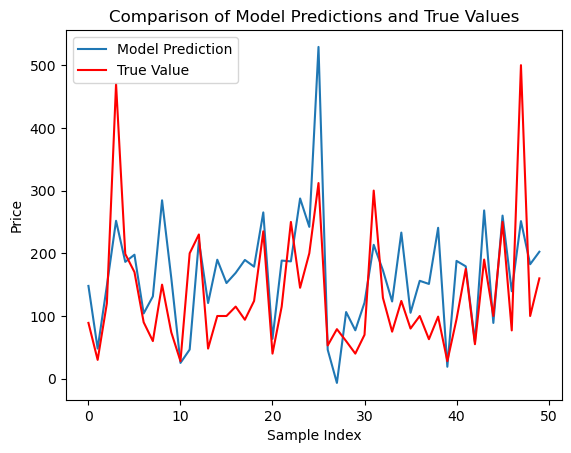

In [ ]:
"""
few significant outliers can disrupt its predictions.
"""

import matplotlib.pyplot as plt

plt.plot(range(50), predicted_test_prices[:50], label='Model Prediction')
plt.plot(range(50), testing_dataset_price_labels[:50], 'r', label='True Value')
plt.legend()
plt.title('Comparison of Model Predictions and True Values')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']  
numeric_features = ['latitude', 'longitude']  

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_features = train_set.drop('price', axis=1)
train_labels = train_set['price']

tree_pipeline.fit(train_features, train_labels)

test_features = test_set.drop('price', axis=1)
test_labels = test_set['price']
predictions = tree_pipeline.predict(test_features)

mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 315.42438964412753


In [ ]:
"""
the decision tree regressor seems to be working  better than the last model
"""

from sklearn.metrics import mean_absolute_error

test_predictions = tree_pipeline.predict(test_features)

mean_absolute_error_test = mean_absolute_error(test_labels, test_predictions)

print("Mean Absolute Error on Test Set:", mean_absolute_error_test)


Mean Absolute Error on Test Set: 90.23657838224767


#### Quesetion 6:
Choose two columns of `X_train`, apply differnt feature scaling methods (Sandard scalar, MinMax Scalar, Robust Scalar) introduced in Week 1 Jupyter Notebook on them. Compare the data distribution after scaling with original value using visualization.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

full_dataset = df.drop('price', axis=1)
labels = df['price']

boro = ["neighbourhood_group"]
hood = ["neighbourhood"]
room = ["room_type"]
latSc = ["latitude"]
lonSc = ["longitude"]

full_transformation_pipeline = ColumnTransformer([
        ("boroTrans", OneHotEncoder(), boro),
        ("hoodTrans", OneHotEncoder(), hood),
        ("roomTrans", OneHotEncoder(), room),
        ("latTrans", RobustScaler(), latSc),
        ("lonTrans", RobustScaler(), lonSc)
    ])

transformed_full_dataset = full_transformation_pipeline.fit_transform(full_dataset)

transformed_training_set, transformed_testing_set, labels_for_transformed_training_set, labels_for_transformed_testing_set = train_test_split(
    transformed_full_dataset, 
    labels, 
    test_size=0.2, 
    shuffle=False
)

linear_regression_model = LinearRegression()
linear_regression_model.fit(transformed_training_set, labels_for_transformed_training_set)

model_performance_score = linear_regression_model.score(transformed_testing_set, labels_for_transformed_testing_set)
print("Model Performance Score:", model_performance_score)


Model Performance Score: 0.10553900183592835


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

predicted_prices_from_linear_regression = linear_regression_model.predict(transformed_training_set)

mean_squared_error_for_linear_regression = mean_squared_error(labels_for_transformed_training_set, predicted_prices_from_linear_regression)

root_mean_squared_error_for_linear_regression = np.sqrt(mean_squared_error_for_linear_regression)

print("Root Mean Squared Error on Training Set:", root_mean_squared_error_for_linear_regression)


Root Mean Squared Error on Training Set: 219.9431202571064


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error_for_linear_regression = mean_absolute_error(labels_for_transformed_training_set, predicted_prices_from_linear_regression)

print("Mean Absolute Error on Training Set:", mean_absolute_error_for_linear_regression)


Mean Absolute Error on Training Set: 66.7775914466423
